In [1]:
import os
print(os.getcwd())

/Users/nickkon/projects/pet/ITEA/Lection_2


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


In [3]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('../data/gm_2008_region.csv')

In [4]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [6]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [7]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


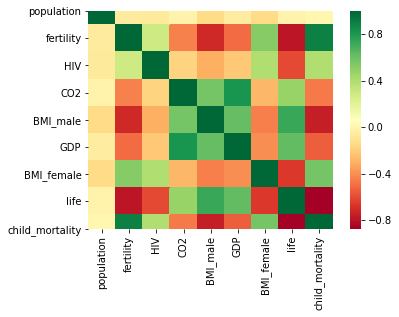

In [8]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

## Train model

In [9]:
y = df.life
X_fertility = df[['fertility']]

In [10]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_fertility, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(97, 1)

In [12]:
y_train.shape

(97,)

In [13]:
# Create the regressor: reg
reg = LinearRegression()

In [14]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = reg.predict(X_test)
y_pred[:3]

array([71.69010489, 71.45978954, 76.43460116])

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [17]:
mean_squared_error?

In [18]:
mean_squared_error(y_test, y_pred)

17.589870144335915

In [19]:
mean_absolute_error(y_test, y_pred)

3.641600540872168

In [20]:
print("r2: {:.2f}".format(r2_score(y_test, y_pred)))

r2: 0.73


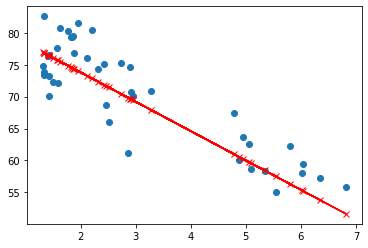

In [21]:
plt.figure()
plt.scatter(X_test, y_test, marker='o')
plt.plot(X_test, y_pred, marker='x', color='red')
plt.show()

In [41]:
plt.scatter?

## Improve model using other variables

In [22]:
X_all = df.drop(columns=['life', 'Region'])
X_all.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2


In [23]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

In [24]:
reg_all = LinearRegression()

In [25]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = reg_all.predict(X_test)
y_pred[:3]

array([69.78523121, 71.71746546, 75.4383211 ])

In [27]:
mean_absolute_error(y_test, y_pred)

2.362530111495483

In [28]:
print("r2: {:.2f}".format(r2_score(y_test, y_pred)))

r2: 0.84


In [29]:
print(reg_all.coef_)

[-2.03205166e-09 -3.30810286e-01 -7.21234146e-01 -1.47522293e-01
  4.93199538e-01  1.37767248e-04 -2.52417353e-01 -8.67212952e-02]


## Add categorical variable

In [31]:
X_all = df.drop(columns=['life'])
X_all.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,East Asia & Pacific


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
X_prep = pd.get_dummies(X_all)

In [40]:
X_prep.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,0,1,0,0,0,0


In [50]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()
X_prep_scaled = sc.fit_transform(X_prep)

In [54]:
X_prep_scaled[:3]

array([[-0.00631163, -0.17092402, -0.41328844, -0.18107148, -0.01219855,
        -0.22597791,  0.718822  , -0.34234326, -0.49099025, -0.33466401,
        -0.64681322,  3.591657  , -0.23028309, -0.63564173],
       [-0.14349234,  2.1278789 ,  0.01920939, -0.47800752, -1.07759471,
        -0.49826223,  0.76815006,  3.22439029, -0.49099025, -0.33466401,
        -0.64681322, -0.27842302, -0.23028309,  1.57321327],
       [ 0.04474163, -0.47536008, -0.32223626,  0.05208273,  1.3076395 ,
        -0.10412663, -1.75283262, -0.65182598,  2.03670031, -0.33466401,
        -0.64681322, -0.27842302, -0.23028309, -0.63564173]])

In [65]:
X_prep_scaled_df = pd.DataFrame(X_prep_scaled, columns=X_prep.columns)
X_prep_scaled_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,-0.342343,-0.49099,-0.334664,-0.646813,3.591657,-0.230283,-0.635642
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,3.224390,-0.49099,-0.334664,-0.646813,-0.278423,-0.230283,1.573213
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,-0.651826,2.03670,-0.334664,-0.646813,-0.278423,-0.230283,-0.635642
3,-0.298071,-0.997250,-0.413288,-0.425211,0.332681,-0.483632,1.370971,-0.550860,-0.49099,-0.334664,1.546041,-0.278423,-0.230283,-0.635642
4,-0.129488,-0.649324,-0.413288,2.170503,1.335817,1.289221,-2.093057,-0.875707,-0.49099,2.988072,-0.646813,-0.278423,-0.230283,-0.635642


In [66]:
X_prep.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')

In [55]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_prep_scaled, y, test_size=0.3, random_state=42)

In [56]:
reg_all = LinearRegression()

In [57]:
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y_pred = reg_all.predict(X_test)
y_pred[:3]

array([70.23028409, 71.39533845, 75.21381669])

In [59]:
mean_absolute_error(y_test, y_pred)

2.45501313311091

In [60]:
print("r2: {:.2f}".format(r2_score(y_test, y_pred)))

r2: 0.82


In [113]:
len(reg_all.coef_)

14

In [115]:
len(X_merged.columns)

14

### Pipeline

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [70]:
le = LabelEncoder().fit(df['Region'])

In [71]:
le.transform(df['Region'])

array([3, 5, 0, 2, 1, 2, 2, 0, 4, 0, 2, 2, 0, 5, 4, 0, 5, 0, 2, 5, 5, 1,
       5, 0, 5, 0, 0, 5, 5, 0, 5, 2, 0, 2, 3, 0, 3, 0, 5, 5, 2, 1, 2, 2,
       5, 5, 2, 2, 5, 2, 0, 5, 5, 0, 0, 0, 2, 2, 4, 1, 3, 2, 3, 2, 0, 1,
       2, 5, 2, 3, 5, 5, 2, 2, 5, 5, 1, 4, 5, 2, 5, 5, 0, 2, 1, 3, 5, 1,
       4, 2, 1, 0, 5, 5, 2, 3, 4, 0, 1, 0, 0, 1, 2, 2, 3, 2, 2, 5, 5, 2,
       5, 1, 2, 2, 5, 5, 2, 4, 5, 0, 5, 2, 2, 2, 5, 1, 5, 0, 3, 2, 5, 2,
       2, 0, 0, 2, 1, 5, 5])

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin
class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.

    The data is expected to be stored in a 2D data structure, where the first
    index is over features and the second is over samples.  i.e.

    >> len(data[key]) == n_samples

    Please note that this is the opposite convention to scikit-learn feature
    matrixes (where the first index corresponds to sample).

    ItemSelector only requires that the collection implement getitem
    (data[key]).  Examples include: a dict of lists, 2D numpy array, Pandas
    DataFrame, numpy record array, etc.

    >> data = {'a': [1, 5, 2, 5, 2, 8],
               'b': [9, 4, 1, 4, 1, 3]}
    >> ds = ItemSelector(key='a')
    >> data['a'] == ds.transform(data)

    ItemSelector is not designed to handle data grouped by sample.  (e.g. a
    list of dicts).  If your data is structured this way, consider a
    transformer along the lines of `sklearn.feature_extraction.DictVectorizer`.

    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [95]:
num_col = list(X_num.columns)
print(num_col)

['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']


In [96]:
scale_pipeline = Pipeline(
    steps=[
        ('selector', ItemSelector(key=num_col)),
        ("scaling", StandardScaler())
    ])

In [101]:
scaled = scale_pipeline.fit_transform(X_all)
scaled_df = pd.DataFrame(scaled, columns=num_col)
scaled_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,-0.342343
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,3.224390
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,-0.651826
3,-0.298071,-0.997250,-0.413288,-0.425211,0.332681,-0.483632,1.370971,-0.550860
4,-0.129488,-0.649324,-0.413288,2.170503,1.335817,1.289221,-2.093057,-0.875707


In [102]:
X_dum = pd.get_dummies(X_all['Region'])
X_dum.head()

,America,East Asia & Pacific,Europe & Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [129]:
X_merged = pd.concat([scaled_df, X_dum], axis=1)
X_merged.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,America,East Asia & Pacific,Europe & Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,-0.342343,0,0,0,1,0,0
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,3.224390,0,0,0,0,0,1
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,-0.651826,1,0,0,0,0,0
3,-0.298071,-0.997250,-0.413288,-0.425211,0.332681,-0.483632,1.370971,-0.550860,0,0,1,0,0,0
4,-0.129488,-0.649324,-0.413288,2.170503,1.335817,1.289221,-2.093057,-0.875707,0,1,0,0,0,0


In [181]:
X_merged.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality', 'America', 'East Asia & Pacific',
       'Europe & Central Asia', 'Middle East & North Africa', 'South Asia',
       'Sub-Saharan Africa'],
      dtype='object')

In [92]:
X_num = X_num.drop(columns="Region", errors="ignore")

In [ ]:
scale_pipeline

In [72]:
from sklearn.pipeline import FeatureUnion

In [74]:
fe = FeatureUnion([
    ("scaling", StandardScaler()),
    ("ohe", ohe_pipeline)
])

In [104]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_merged, y, test_size=0.3, random_state=42)

In [146]:
from sklearn.linear_model import Lasso, Ridge

In [171]:
reg_all = Lasso(alpha=2)

In [172]:
reg_all.fit(X_train, y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [173]:
y_pred = reg_all.predict(X_test)
y_pred[:3]

array([70.06417363, 72.32830062, 74.28438169])

In [174]:
mean_absolute_error(y_test, y_pred)

2.690535510522394

In [175]:
print("r2: {:.2f}".format(r2_score(y_test, y_pred)))

r2: 0.84


In [176]:
print(reg_all.coef_)

[-0.         -0.         -1.87215623  0.          0.59740778  0.22210265
 -0.48454393 -4.52850751  0.         -0.          0.          0.
  0.         -0.        ]


In [177]:
lasso_coef = reg_all.coef_

In [178]:
lasso_coef_df = pd.Series(lasso_coef, index=list(X_merged.columns))

In [179]:
lasso_coef_df

population                   -0.000000
fertility                    -0.000000
HIV                          -1.872156
CO2                           0.000000
BMI_male                      0.597408
GDP                           0.222103
BMI_female                   -0.484544
child_mortality              -4.528508
America                       0.000000
East Asia & Pacific          -0.000000
Europe & Central Asia         0.000000
Middle East & North Africa    0.000000
South Asia                    0.000000
Sub-Saharan Africa           -0.000000
dtype: float64

In [159]:
Lasso
[-0.         -0.         -2.50570038  0.          0.79490131  1.21728398
 -0.81100751 -4.43082342  0.         -0.          0.          0.
  0.         -0.        ]

sklearn.linear_model.coordinate_descent.Lasso

In [ ]:
Ridge
[-0.34482015 -0.97887219 -3.18949892 -0.84300735  0.54900238  2.56825995
 -1.52357908 -3.74369832  0.29844186 -2.76590791  0.36009399  1.51410701
  0.34978116  0.2434839 ]

In [119]:
import pandas as pd
from pandas.api.types import CategoricalDtype

from sklearn.base import BaseEstimator, TransformerMixin


class DummyTransformer(BaseEstimator, TransformerMixin):
    """Custom transformer to implement pandas 'get_dummies' into sklearn pipeline
    As an alternative:
    http://contrib.scikit-learn.org/categorical-encoding/onehot.html
    can be used
    """

    def __init__(self, columns_to_dummies, n_minus_one=False, sep='=', sparse=False,
                 add_unseen_column=False, unseen_name='unseen'):

        """
        :param unseen_name: the name of unseen column
        :param add_unseen_column: bool. True if you want to add 'unseen' column
        :param columns_to_dummies: list of columns that needs to be one-hot encoded.
        :param n_minus_one: takes n-1 columns for one-hot encoding if True, and n columns if False.
        :param sep: separator. prefix_sep in pd.get_dummies
        """
        # TODO: adjust documentation

        self.train_data_categories = dict()
        self.columns_to_dummies = columns_to_dummies
        self.n_minus_one = n_minus_one
        self.train_columns = None
        self.raw_columns = None
        self.sep = sep
        self.sparse = sparse

        self.unseen_name = unseen_name
        self.add_unseen_column = add_unseen_column

    def fit(self, X, y=None):
        """
        :param X: input dataframe.
        :return: {categorical value: encoded value}
        """

        for column in self.columns_to_dummies:
            self.train_data_categories[column] = X[column].unique().tolist()
            if self.add_unseen_column:
                self.train_data_categories[column].append(self.unseen_name)

        return self

    def transform(self, X):
        """
        :param X: input dataframe.
        :return: data frame where each selected column is one-hot encoded.
        """

        for col in self.columns_to_dummies:

            if self.add_unseen_column:
                all_values = X[col].unique().tolist()
                new_values = list(set(all_values) - set(self.train_data_categories[col]))
                X[col] = X[col].replace({k: self.unseen_name for k in new_values})  # TODO

            X[col] = X[col].astype(CategoricalDtype(categories=self.train_data_categories[col]))

        X_dum = pd.get_dummies(X, columns=self.columns_to_dummies,
                               drop_first=self.n_minus_one, prefix_sep=self.sep,
                               sparse=self.sparse)

        return X_dum

In [120]:
dt = DummyTransformer(columns_to_dummies=['Region'])

In [132]:
ohe_pipeline = Pipeline(
    steps=[
        ("select", ItemSelector(key=['Region'])),
        ("dummy", DummyTransformer(columns_to_dummies=['Region'])),
    ])

In [133]:
fe = FeatureUnion([
    ("scaling", scale_pipeline),
    ("ohe", ohe_pipeline)
])

In [136]:
X_pr = fe.fit_transform(X_all)
X_pr_df = pd.DataFrame(X_pr, columns=X_merged.columns)

/Users/nickkon/.local/share/virtualenvs/itea-intro-ds/lib/python3.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
X_pr_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,America,East Asia & Pacific,Europe & Central Asia,Middle East & North Africa,South Asia,Sub-Saharan Africa
0,-0.006312,-0.170924,-0.413288,-0.181071,-0.012199,-0.225978,0.718822,-0.342343,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.143492,2.127879,0.019209,-0.478008,-1.077595,-0.498262,0.768150,3.224390,0.0,1.0,0.0,0.0,0.0,0.0
2,0.044742,-0.475360,-0.322236,0.052083,1.307639,-0.104127,-1.752833,-0.651826,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.298071,-0.997250,-0.413288,-0.425211,0.332681,-0.483632,1.370971,-0.550860,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.129488,-0.649324,-0.413288,2.170503,1.335817,1.289221,-2.093057,-0.875707,0.0,0.0,0.0,0.0,1.0,0.0
